# MDS Tutorial

1. Distance Matrix 구하기
2. Distance Matrix로 B를 구하기.
3. B = XX^T이므로, B에서  Eigen Values & Eigen Vectors 구하여 B=VAV^T를 구하면 XX^T의 반을 떼어, X=VA^1/2가 된다.

## 1. Distance Matrix D에서 B를 구하는 Calculation 

- Distance Matrix에서 B Matrix를 구해낸다.

In [2]:
import numpy
import matplotlib.pyplot as plt
import sys


def bval(D, r, s):
    n = D.shape[0]
    total_r = numpy.sum(D[:,s] ** 2)
    total_s = numpy.sum(D[r,:] ** 2)
    total = numpy.sum(D ** 2)
    val = (D[r,s] ** 2) - (float(total_r) / float(n)) - (float(total_s) / float(n)) + (float(total) / float(n * n))
    return -0.5 * val



## 1. 데이터 정의 및 Distance Matrix D 구하기 (L2 Norm 거리)
- Y는 원본 데이터 입니다.
- 데이터 개수는 3개 입니다.

In [3]:
# 1. 3개의 Data를 정의합니다. 각각들의 Dimension은 알려져있지 않고, 단지 Similarity(or Distnace) Metric으로 거리가 계산된, Distance Matrix를 갖고 있습니다.
n = 3  
Y = numpy.array([[20, 18], [2, 13], [7, 24]], dtype=float)

D = numpy.zeros((n, n), dtype=float)

for i in range(0, n):
    for j in range(0, n):
        D[i, j] = numpy.linalg.norm(Y[i,:] - Y[j,:]) # L2-Nrom으로 정규화 합니다.

print("Distance Matrix D")
print(D)


Distance Matrix D
[[ 0.         18.68154169 14.31782106]
 [18.68154169  0.         12.08304597]
 [14.31782106 12.08304597  0.        ]]


## 2. Calculate B Matrix를 구합니다. 
- bval function사용하여 D Matrix에서 B를 구합니다.

In [4]:
# 2. B Matrix를 구합니다.
B = numpy.zeros((n, n), dtype=complex) # B = numpy.zeros((n, n))를 사용하면 안됨. Sqrt시에 -값이 들어가기 때문.

for i in range(0, n):
    for j in range(0, n):
        B[i,j] = bval(D, i, j)

print("\nB matix")
print(B)



B matix
[[106.88888889+0.j -77.44444444+0.j -29.44444444+0.j]
 [-77.44444444+0.j  87.22222222+0.j  -9.77777778+0.j]
 [-29.44444444+0.j  -9.77777778+0.j  39.22222222+0.j]]


## 3. Calculate Matrix X by Eigen Vector & Values from Matrix B
- Matrix B에서 Eigen Vector와 Eigen Value를 구합니다. 이를 통해 Matrix A와, 차원이 변형된 X를 구합니다.

In [5]:
# w, V = numpy.linalg.eig(D)   
# idx = w.argsort()[::-1]
# w = w[idx]
# V = V[:,idx]

# print("\nEigenvalues of the distance matrix =", w)


# 3. B에서 Eigen Vector와 Eigen Value를 구합니다.
a, V = numpy.linalg.eig(B)
idx = a.argsort()[::-1]
a = a[idx]
V = V[:,idx]
print("Eigen Values =", a)
print("Eigen vectors=", V)

A = numpy.diag(numpy.sqrt(a))
X = numpy.dot(V, A)

print("\nMatrix A")
print(A)

print("\nMatrix X")
print(X)




Eigen Values = [1.76955785e+02+0.j 5.63775484e+01+0.j 1.88925970e-14+0.j]
Eigen vectors= [[ 0.75813097+0.j -0.30315689+0.j  0.57735027+0.j]
 [-0.64160705-0.j -0.50498223+0.j  0.57735027-0.j]
 [-0.11652392-0.j  0.80813912+0.j  0.57735027-0.j]]

Matrix A
[[1.33024729e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 7.50849841e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 1.37450344e-07+0.j]]

Matrix X
[[ 1.00850167e+01+0.j -2.27625304e+00+0.j  7.93569930e-08+0.j]
 [-8.53496043e+00+0.j -3.79165829e+00+0.j  7.93569930e-08+0.j]
 [-1.55005623e+00+0.j  6.06791133e+00+0.j  7.93569930e-08+0.j]]


## 4. Visualization

- 원본(Y)값을 Red로, 차원 축소된 점(X)를 Blue로 하여 2차원 평면에 Scatter합니다.

RMSE = 2.0511601988091347e-15


c:\venv_python_3.10\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


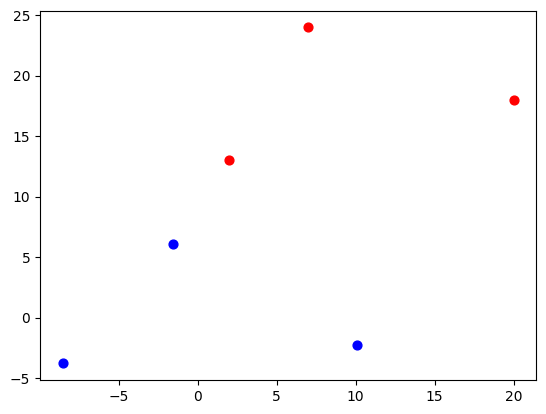

In [6]:

error = 0.0
total = 0

for i in range(0, n):
    for j in range(i+1, n):
        error += (numpy.linalg.norm(X[i] - X[j]) - D[i, j]) ** 2
        total += 1
RMSE = numpy.sqrt(error / float(total))
print("RMSE =", RMSE)

if RMSE > 0:
    plt.scatter(X[:,0], X[:,1], c='b', s=40)
    plt.scatter(Y[:,0], Y[:,1], c='r', s=40)
    plt.show()